##Loading the data and importing libraries



In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
%matplotlib inline

In [4]:
from google.colab import files
uploaded = files.upload()


Saving advertising.csv to advertising.csv


In [5]:
advert = pd.read_csv("advertising.csv")
advert.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [6]:
#To show how many rows and columns in the dataset
advert.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [8]:
#remiving the index column

'''advert.columns 
advert.drop(['Unnamed: 0'], axis =1 , inplace = True) ##unnamed column removed
advert.head()'''

"advert.columns \nadvert.drop(['Unnamed: 0'], axis =1 , inplace = True) ##unnamed column removed\nadvert.head()"

# Exploratory data analysis

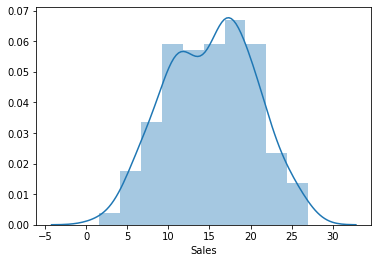

In [15]:
import seaborn as sns
sns.distplot(advert.Sales)

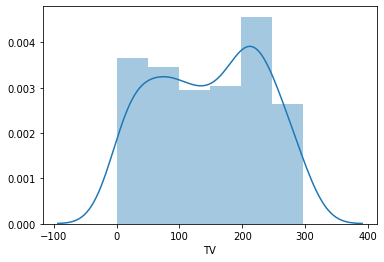

In [16]:
sns.distplot(advert.TV)

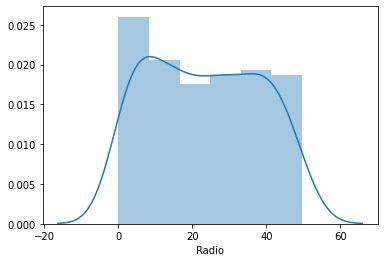

In [17]:
sns.distplot(advert.Radio)

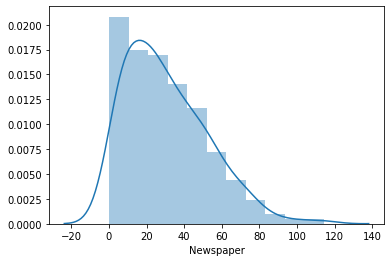

In [18]:
sns.distplot(advert.Newspaper)

#Exploring replationship between Predictors and Respons

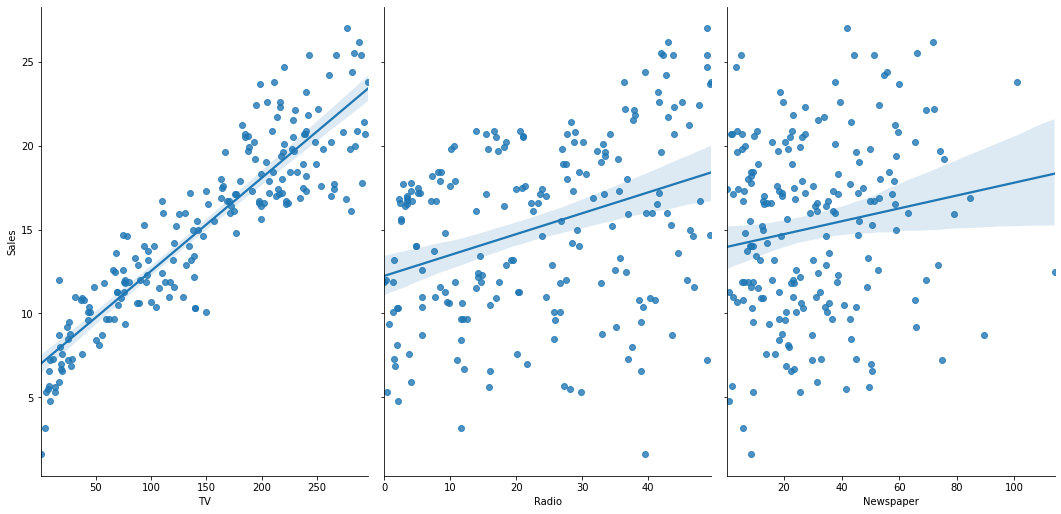

In [23]:
sns.pairplot(advert, x_vars= ['TV', 'Radio', 'Newspaper'], y_vars= 'Sales', height= 7, kind= 'reg', aspect= 0.7)

In [30]:
#co relation value 
advert.TV.corr(advert.Sales)

0.9012079133023306

In [29]:
advert.Newspaper.corr(advert.Sales)

0.15796002615492621

In [31]:
advert.Radio.corr(advert.Sales)

0.3496310970076693

In [32]:
advert.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


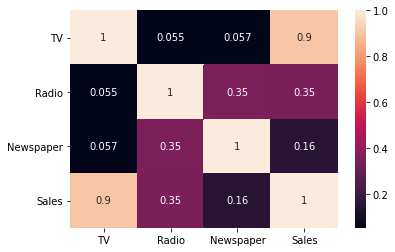

In [33]:
sns.heatmap(advert.corr(), annot= True)

#Creating the simple linear regression model

In [35]:
X = advert[['TV']]
X.head()

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [40]:
#check the type
print(type(X))
print(X.shape)      #rows and columns

<class 'pandas.core.frame.DataFrame'>
(200, 1)


In [41]:
y = advert.Sales
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(200,)


In [44]:
#training and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state= 1)            #feature matrix X, target maatrix y
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(150, 1)
(150,)
(50, 1)
(50,)


In [45]:
from sklearn.linear_model import LinearRegression 
linereg = LinearRegression()
linereg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# Interpreting model coefficient

In [46]:
print(linereg.intercept_) #beta0
print(linereg.coef_)    #beta1

6.902718095764663
[0.05565473]


#Making prediction

In [53]:
y_pred = linereg.predict(X_test)
y_pred[:5]      #first 5 value of predicted sales revenue

array([18.63473515, 18.17280089, 12.22887574, 22.4971734 , 21.02788853])

#Model Evaluation Matrix

In [75]:
true = [100, 50, 30, 20]
pred = [90, 50, 50, 30]
# mean absoute error(MAE)
#print((10+0+20+10)/4)        #hand calculation

from sklearn import metrics
print(metrics.mean_absolute_error(true, pred))


#Mean square error(MSE)
#print(np.sqrt((10**2 + 0**2 + 20**2 + 10**2)/4))
print(np.sqrt(metrics.mean_squared_error(true, pred)))

#Root Mean Square Erron(RMSE)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

10.0
12.24744871391589
2.2564722695411
